# Importação e Extratação

In [77]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
import yellowbrick as yb

In [78]:
df = pd.read_csv('/content/dados_tratados.csv')

In [79]:
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Contas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.796667


# Preparação dos Dados

In [80]:
df_limpo = df.drop(['customerID', 'PaymentMethod'], axis=1)

In [81]:
df_limpo.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,Charges.Monthly,Charges.Total,Contas_Diarias
0,0,Female,0,1,1,9,1,0,DSL,0,1,0,1,1,0,One year,1,65.6,593.30,2.186667
1,0,Male,0,0,0,9,1,1,DSL,0,0,0,0,0,1,Month-to-month,0,59.9,542.40,1.996667
2,1,Male,0,0,0,4,1,0,Fiber optic,0,0,1,0,0,0,Month-to-month,1,73.9,280.85,2.463333
3,1,Male,1,1,0,13,1,0,Fiber optic,0,1,1,0,1,1,Month-to-month,1,98.0,1237.85,3.266667
4,1,Female,1,1,0,3,1,0,Fiber optic,0,0,0,1,1,0,Month-to-month,1,83.9,267.40,2.796667


In [82]:
df_encoded = pd.get_dummies(df_limpo, columns=['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling'], drop_first=True)
display(df_encoded.head())

,Churn,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,Contas_Diarias,gender_Male,Partner_1,Dependents_1,PhoneService_1,...,InternetService_No,OnlineSecurity_1,OnlineBackup_1,DeviceProtection_1,TechSupport_1,StreamingTV_1,StreamingMovies_1,Contract_One year,Contract_Two year,PaperlessBilling_1
0,0,0,9,65.6,593.30,2.186667,False,True,True,True,...,False,False,True,False,True,True,False,True,False,True
1,0,0,9,59.9,542.40,1.996667,True,False,False,True,...,False,False,False,False,False,False,True,False,False,False
2,1,0,4,73.9,280.85,2.463333,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
3,1,1,13,98.0,1237.85,3.266667,True,True,False,True,...,False,False,True,True,False,True,True,False,False,True
4,1,1,3,83.9,267.40,2.796667,False,True,False,True,...,False,False,False,False,True,True,False,False,False,True


In [83]:
proporcao = df_encoded['Churn'].value_counts()
print("Contagem de clientes por classe (evasão):")
print(proporcao)

proporcao = df_encoded['Churn'].value_counts(normalize=True)
print("\nProporção de clientes por classe (evasão):")
print(proporcao)

if proporcao.min() < 0.2:
    print("\nAtenção: As classes estão desbalanceadas, o que pode impactar a performance do modelo.")

Contagem de clientes por classe (evasão):
Churn
0    5398
1    1869
Name: count, dtype: int64

Proporção de clientes por classe (evasão):
Churn
0    0.74281
1    0.25719
Name: proportion, dtype: float64


In [84]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import numpy as np

# X = df_encoded_sklearn.drop('Churn', axis=1)
# y = df_encoded_sklearn['Churn']

# X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# colunas_numericas = X_treino.select_dtypes(include=np.number).columns

# imputador = SimpleImputer(strategy='mean')
# X_treino[colunas_numericas] = imputador.fit_transform(X_treino[colunas_numericas])
# X_teste[colunas_numericas] = imputador.transform(X_teste[colunas_numericas])

# smote = SMOTE(random_state=42)
# X_treino_balanceado, y_treino_balanceado = smote.fit_resample(X_treino, y_treino)

# The preprocessing and SMOTE are handled in cell Rca6FgMYzrSz.

In [85]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd

X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

colunas_numericas = X_treino.select_dtypes(include=np.number).columns
colunas_nao_numericas = X_treino.select_dtypes(exclude=np.number).columns

transformador_numerico = Pipeline(steps=[
    ('imputador', SimpleImputer(strategy='mean')),
    ('escalador', StandardScaler())
])

pre_processador = ColumnTransformer(
    transformers=[
        ('num', transformador_numerico, colunas_numericas),
        ('cat', 'passthrough', colunas_nao_numericas)
    ])

X_treino_processado = pre_processador.fit_transform(X_treino)
X_teste_processado = pre_processador.transform(X_teste)

nomes_features_numericas_escalonadas = pre_processador.named_transformers_['num'].named_steps['escalador'].get_feature_names_out(colunas_numericas)

nomes_features_nao_numericas = colunas_nao_numericas.tolist()

todos_nomes_features_processadas = list(nomes_features_numericas_escalonadas) + nomes_features_nao_numericas


X_treino_processado = pd.DataFrame(X_treino_processado, columns=todos_nomes_features_processadas, index=X_treino.index)
X_teste_processado = pd.DataFrame(X_teste_processado, columns=todos_nomes_features_processadas, index=X_teste.index)


smote = SMOTE(random_state=42)
X_treino_balanceado, y_treino_balanceado = smote.fit_resample(X_treino_processado, y_treino)

# Seleção de Variáveis Relevantes

In [86]:
df_numerico = df_limpo.select_dtypes(include=np.number)

matriz_correlacao = df_numerico.corr()

print("\nCorrelação com a variável 'Churn':")
print(matriz_correlacao['Churn'].sort_values(ascending=False))


Correlação com a variável 'Churn':
Churn               1.000000
Contas_Diarias      0.189866
Charges.Monthly     0.189866
PaperlessBilling    0.186666
SeniorCitizen       0.146733
StreamingTV         0.062430
StreamingMovies     0.060586
MultipleLines       0.039343
PhoneService        0.012571
DeviceProtection   -0.063452
OnlineBackup       -0.080163
Partner            -0.148546
TechSupport        -0.160440
Dependents         -0.161384
OnlineSecurity     -0.166828
Charges.Total      -0.194440
tenure             -0.344079
Name: Churn, dtype: float64


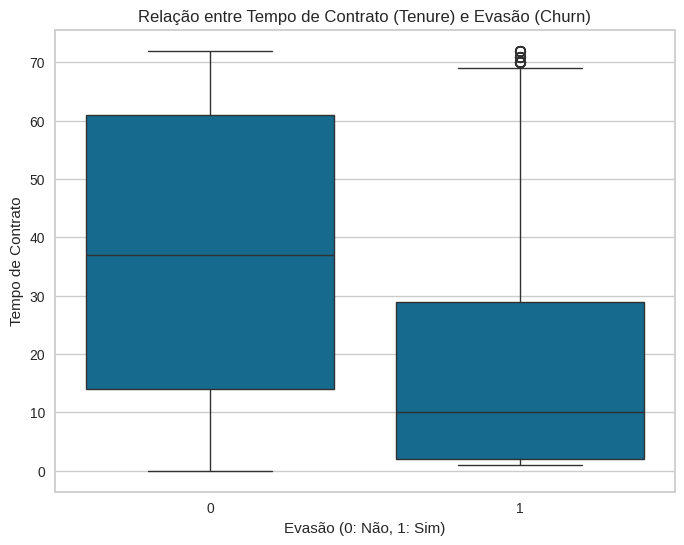

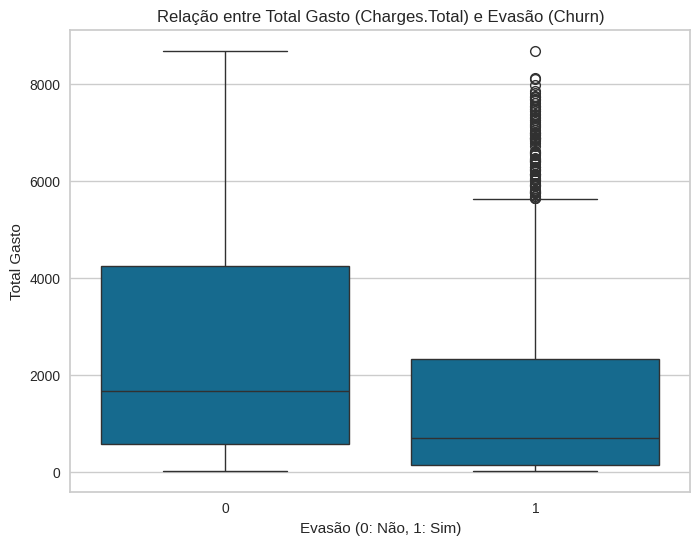

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='tenure', data=df_limpo)
plt.title('Relação entre Tempo de Contrato (Tenure) e Evasão (Churn)')
plt.xlabel('Evasão (0: Não, 1: Sim)')
plt.ylabel('Tempo de Contrato')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='Charges.Total', data=df_limpo)
plt.title('Relação entre Total Gasto (Charges.Total) e Evasão (Churn)')
plt.xlabel('Evasão (0: Não, 1: Sim)')
plt.ylabel('Total Gasto')
plt.show()

# Modelagem

In [88]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Formato de X_treino:", X_treino.shape)
print("Formato de X_teste:", X_teste.shape)
print("Formato de y_treino:", y_treino.shape)
print("Formato de y_teste:", y_teste.shape)


Formato de X_treino: (5813, 21)
Formato de X_teste: (1454, 21)
Formato de y_treino: (5813,)
Formato de y_teste: (1454,)


In [89]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

modelo_knn = KNeighborsClassifier(n_neighbors=5)

modelo_knn.fit(X_treino_balanceado, y_treino_balanceado)

y_pred_knn_treino = modelo_knn.predict(X_treino_processado)

y_pred_knn = modelo_knn.predict(X_teste_processado)

print("Avaliação do Modelo KNN no Conjunto de Treino:")
print("Acurácia:", accuracy_score(y_treino, y_pred_knn_treino))
print("\nRelatório de Classificação:\n", classification_report(y_treino, y_pred_knn_treino))
print("\nMatriz de Confusão:\n", confusion_matrix(y_treino, y_pred_knn_treino))

print("-" * 50)

print("Avaliação do Modelo KNN no Conjunto de Teste:")
print("Acurácia:", accuracy_score(y_teste, y_pred_knn))
print("\nRelatório de Classificação:\n", classification_report(y_teste, y_pred_knn))
print("\nMatriz de Confusão:\n", confusion_matrix(y_teste, y_pred_knn))

Avaliação do Modelo KNN no Conjunto de Treino:
Acurácia: 0.8090486839841734

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.96      0.77      0.86      4318
           1       0.58      0.92      0.71      1495

    accuracy                           0.81      5813
   macro avg       0.77      0.84      0.78      5813
weighted avg       0.87      0.81      0.82      5813


Matriz de Confusão:
 [[3333  985]
 [ 125 1370]]
--------------------------------------------------
Avaliação do Modelo KNN no Conjunto de Teste:
Acurácia: 0.6960110041265475

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.88      0.69      0.77      1080
           1       0.44      0.72      0.55       374

    accuracy                           0.70      1454
   macro avg       0.66      0.70      0.66      1454
weighted avg       0.76      0.70      0.71      1454


Matriz de Confusão:
 [[743 337]
 [

In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

modelo_rf = RandomForestClassifier(random_state=42)

modelo_rf.fit(X_treino_balanceado, y_treino_balanceado)

y_pred_rf_treino = modelo_rf.predict(X_treino_processado)

y_pred_rf = modelo_rf.predict(X_teste_processado)

print("Avaliação do Modelo Random Forest no Conjunto de Treino:")
print("Acurácia:", accuracy_score(y_treino, y_pred_rf_treino))
print("\nRelatório de Classificação:\n", classification_report(y_treino, y_pred_rf_treino))
print("\nMatriz de Confusão:\n", confusion_matrix(y_treino, y_pred_rf_treino))

print("-" * 50)

print("Avaliação do Modelo Random Forest no Conjunto de Teste:")
print("Acurácia:", accuracy_score(y_teste, y_pred_rf))
print("\nRelatório de Classificação:\n", classification_report(y_teste, y_pred_rf))
print("\nMatriz de Confusão:\n", confusion_matrix(y_teste, y_pred_rf))

Avaliação do Modelo Random Forest no Conjunto de Treino:
Acurácia: 0.9905384483055221

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      4318
           1       0.98      0.99      0.98      1495

    accuracy                           0.99      5813
   macro avg       0.99      0.99      0.99      5813
weighted avg       0.99      0.99      0.99      5813


Matriz de Confusão:
 [[4281   37]
 [  18 1477]]
--------------------------------------------------
Avaliação do Modelo Random Forest no Conjunto de Teste:
Acurácia: 0.7668500687757909

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.84      0.84      0.84      1080
           1       0.55      0.55      0.55       374

    accuracy                           0.77      1454
   macro avg       0.70      0.70      0.70      1454
weighted avg       0.77      0.77      0.77      1454


Matriz de Conf

 **Justificativa dos Modelos**

Foram selecionados dois modelos para análise: KNN e Random Forest. O KNN foi escolhido por sua simplicidade e interpretabilidade inicial. No entanto, sua performance é influenciada pela escala das features, tornando a normalização dos dados essencial para garantir que todas as dimensões contribuam equitativamente para o cálculo de distância.

Já o Random Forest foi escolhido por sua capacidade de geralmente apresentar maior acurácia em comparação com modelos mais simples e por ser menos propenso a overfitting do que árvores de decisão individuais.

In [91]:
print("Avaliação do Modelo KNN:")
print("Acurácia:", accuracy_score(y_teste, y_pred_knn))
print("\nRelatório de Classificação:\n", classification_report(y_teste, y_pred_knn))
print("\nMatriz de Confusão:\n", confusion_matrix(y_teste, y_pred_knn))

print("-" * 50)

print("Avaliação do Modelo Random Forest:")
print("Acurácia:", accuracy_score(y_teste, y_pred_rf))
print("\nRelatório de Classificação:\n", classification_report(y_teste, y_pred_rf))
print("\nMatriz de Confusão:\n", confusion_matrix(y_teste, y_pred_rf))

Avaliação do Modelo KNN:
Acurácia: 0.6960110041265475

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.88      0.69      0.77      1080
           1       0.44      0.72      0.55       374

    accuracy                           0.70      1454
   macro avg       0.66      0.70      0.66      1454
weighted avg       0.76      0.70      0.71      1454


Matriz de Confusão:
 [[743 337]
 [105 269]]
--------------------------------------------------
Avaliação do Modelo Random Forest:
Acurácia: 0.7668500687757909

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.84      0.84      0.84      1080
           1       0.55      0.55      0.55       374

    accuracy                           0.77      1454
   macro avg       0.70      0.70      0.70      1454
weighted avg       0.77      0.77      0.77      1454


Matriz de Confusão:
 [[908 172]
 [167 207]]


**Avaliação e Comparação dos Modelos**

O Random Forest apresentou uma acurácia geral maior (0.767 vs 0.696). Na previsão da evasão (Classe 1), o KNN teve um Recall maior (0.72 vs 0.55), identificando mais casos reais de evasão, porém com menor Precisão (0.44 vs 0.55), gerando mais falsos positivos. O Random Forest teve um Precision maior, errando menos ao prever evasão, mas identificando menos casos reais (menor Recall). Ambos tiveram F1-score igual para a Classe 1 (0.55).

Com acurácias no conjunto de teste em torno de 70-77%, os modelos não parecem estar sofrendo de underfitting severo. Eles demonstraram ser capazes de aprender padrões relevantes dos dados e obter resultados razoáveis em dados não vistos.

Overfitting: O overfitting acontece quando um modelo aprende demais os detalhes e ruído dos dados de treino, prejudicando sua capacidade de generalizar para novos dados. O modelo KNN apresenta uma acurácia no treino de 0.809 e no teste de 0.696. Essa diferença sugere um leve overfitting. Já o modelo Random Forest demonstra uma acurácia muito alta no treino (0.991), mas uma acurácia significativamente menor no teste (0.767). Esta grande discrepância é um forte indicativo de overfitting significativo. O Random Forest se ajustou de forma excessiva aos dados de treino.

Estes fatores mostraram o KNN como o melhor modelo entres os dois.


# Importância das Variáveis no Modelo

Importância das Variáveis (Random Forest):
                        Feature  Importance
1                        tenure    0.153374
3                 Charges.Total    0.135915
4                Contas_Diarias    0.123409
2               Charges.Monthly    0.121211
19            Contract_Two year    0.065099
10  InternetService_Fiber optic    0.049923
18            Contract_One year    0.039707
20           PaperlessBilling_1    0.039170
12             OnlineSecurity_1    0.038643
15                TechSupport_1    0.035663
7                  Dependents_1    0.027737
5                   gender_Male    0.025107
6                     Partner_1    0.023328
13               OnlineBackup_1    0.023046
9               MultipleLines_1    0.018570
14           DeviceProtection_1    0.016328
11           InternetService_No    0.015438
17            StreamingMovies_1    0.015165
0                 SeniorCitizen    0.013998
16                StreamingTV_1    0.013629
8                PhoneService_1  

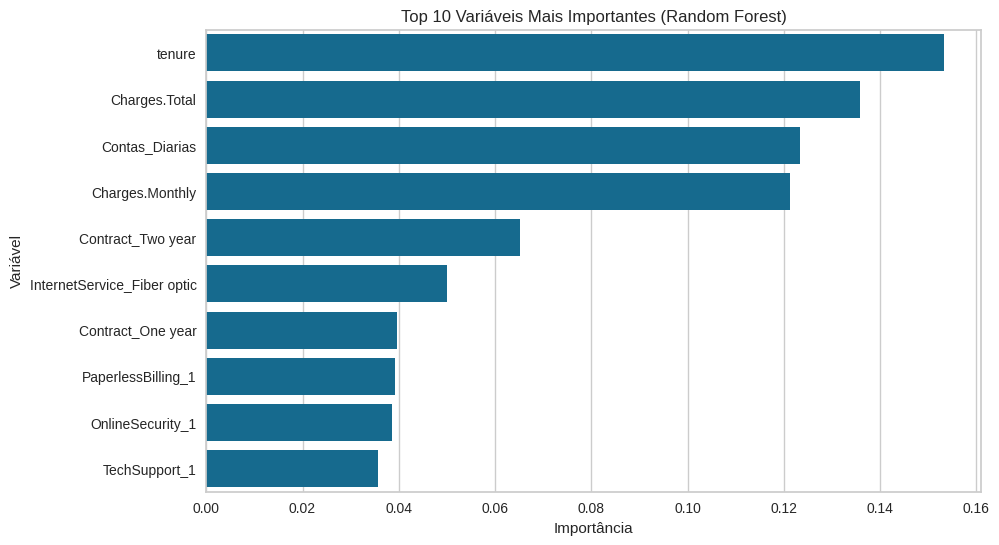

In [92]:
importances = modelo_rf.feature_importances_
features = X_treino_balanceado.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("Importância das Variáveis (Random Forest):")
print(importance_df)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10))
plt.title('Top 10 Variáveis Mais Importantes (Random Forest)')
plt.xlabel('Importância')
plt.ylabel('Variável')
plt.show()

# Conclusão


Com base nas análises realizadas nos dados de clientes e nos modelos de previsão de evasão (Churn), identificamos os seguintes fatores que parecem ter maior influência na decisão dos clientes de cancelar seus serviços:

**Principais Fatores que Influenciam a Evasão:**

*   **Tempo de Contrato (Tenure):** As análises de correlação e os box plots indicaram uma forte relação negativa entre o tempo de contrato e a evasão. Clientes com menor tempo de contrato (tenure) tendem a evadir mais do que clientes de longa data. Isso sugere que os primeiros meses de serviço são críticos para a retenção.
*   **Total Gasto (Charges.Total) e Gasto Mensal (Charges.Monthly):** Variáveis relacionadas aos gastos do cliente também se mostraram relevantes. O Random Forest indicou `Charges.Total` e `Charges.Monthly` como importantes. Clientes com gastos totais menores (especialmente no início do contrato) e, em alguns casos, com gastos mensais mais altos (possivelmente associado a serviços mais caros como fibra óptica) parecem ter maior propensão à evasão. A variável `Contas_Diarias` (que parece ser derivada do gasto mensal) também aparece como relevante.
*   **Tipo de Contrato (Contract):** O tipo de contrato (`Contract_Two year` e `Contract_One year`) teve uma importância considerável no modelo Random Forest. Clientes com contratos de prazo mais curto (mês a mês) são significativamente mais propensos a evadir em comparação com aqueles com contratos de um ou dois anos. Isso reforça que o compromisso de longo prazo está ligado a menor evasão.
*   **Serviço de Internet (InternetService_Fiber optic e InternetService_No):** O tipo de serviço de internet, especialmente a fibra óptica, apareceu como um fator relevante na importância das variáveis do Random Forest. Clientes com serviço de fibra óptica parecem ter uma propensão maior à evasão do que aqueles com DSL ou sem serviço de internet, o que pode indicar problemas de qualidade ou custo percebido. Ter ou não serviço de internet (`InternetService_No`) também é importante.
*   **Serviços de Segurança Online (OnlineSecurity) e Suporte Técnico (TechSupport):** A ausência de serviços adicionais como segurança online e suporte técnico (`OnlineSecurity_1` e `TechSupport_1` com importância negativa na correlação e positiva na importância do Random Forest) parece estar associada a uma maior taxa de evasão. Clientes que não utilizam esses serviços podem se sentir menos seguros ou ter mais dificuldades técnicas não resolvidas.
*   **Faturamento Sem Papel (PaperlessBilling):** Clientes que optam pelo faturamento sem papel (`PaperlessBilling_1`) também apresentaram uma correlação positiva com a evasão e uma importância razoável no Random Forest. Isso pode estar associado a clientes mais jovens ou que preferem canais digitais e que talvez sejam mais propensos a mudar de provedor.

**Desempenho dos Modelos:**

*   O modelo **Random Forest** apresentou melhor acurácia geral (0.767) em comparação com o **KNN** (0.696).
*   Na identificação da classe minoritária (Evasão - Classe 1), o **KNN** teve um Recall maior (0.72), identificando mais clientes que evadiram, mas com menor Precisão (0.44). O **Random Forest** teve um Precision maior (0.55), com menos falsos positivos na previsão de evasão, mas um Recall menor (0.55).
*   A análise de overfitting sugere que o **Random Forest** apresentou um overfitting significativo (alta acurácia no treino vs. menor acurácia no teste), enquanto o **KNN** teve um leve overfitting. Isso indica a necessidade de ajustar os hiperparâmetros do Random Forest para melhorar sua generalização.

**Estratégias de Retenção Propostas:**

Com base nos fatores identificados, sugiro as seguintes estratégias de retenção:

*   **Foco nos Primeiros Meses:** Desenvolver programas de onboarding e acompanhamento intensivo para novos clientes nos primeiros meses de contrato (baixo tenure) para garantir uma boa experiência inicial e mitigar o risco de evasão precoce.
*   **Ofertas de Fidelidade para Contratos Longos:** Incentivar clientes a optarem por contratos de um ou dois anos através de descontos, benefícios exclusivos ou programas de fidelidade, reduzindo a flexibilidade para evadir.
*   **Melhoria na Qualidade do Serviço de Fibra Óptica e Suporte:** Investigar as causas da maior evasão entre clientes de fibra óptica. Pode ser necessário melhorar a qualidade da conexão, oferecer melhor suporte técnico especializado ou ajustar o custo percebido do serviço.
*   **Promoção de Serviços de Segurança e Suporte:** Educar os clientes sobre os benefícios dos serviços de segurança online e suporte técnico e incentivá-los a utilizá-los, possivelmente oferecendo períodos de teste gratuito ou pacotes promocionais. Clientes que se sentem mais seguros e bem assistidos tendem a permanecer.
*   **Análise de Comportamento de Clientes Online/Sem Papel:** Investigar mais a fundo o comportamento dos clientes que optam por faturamento sem papel para entender se há outros padrões associados à evasão nesta coorte e desenvolver estratégias de engajamento digital direcionadas.
*   **Programas de Desconto/Benefícios Baseados em Gasto:** Para clientes com gastos totais menores, especialmente no início, considerar ofertas personalizadas ou programas de benefícios que aumentem o valor percebido do serviço e incentivem a permanência.
